 # Chapter 1 - Introduction to spaCy 

## Intro

https://spacy.io/usage/models#languages

Um objeto spaCy é representado por um objeto de pipeline de processamento. 

Normalmente chamamos essa variável de "nlp". 

Por exemplo, para criar um objeto nlp em inglês, você pode importar a classe do idioma inglês e instanciá-la. Você pode usar o objeto nlp como uma função para analisar texto. Ele contém todos os diferentes componentes do pipeline. Também inclui regras específicas do idioma usadas para tokenizar o texto em palavras e pontuação. spaCy oferece suporte a uma variedade de idiomas disponíveis em `spacy.lang`.

**O objeto Doc**

Quando você processa um texto com o objeto nlp, spaCy cria um objeto Doc - abreviação de "documento". 
O Doc permite que você acesse informações sobre o texto de forma estruturada, e nenhuma informação é perdida. A propósito, o Doc se comporta como uma sequência normal do Python e permite que você itere sobre seus tokens ou obtenha um token por meio de seu índice. Mas mais sobre isso mais tarde!

In [2]:
from spacy.lang.en import English
from spacy.lang.pt import Portuguese

In [3]:
nlp_en = English()
nlp_pt = Portuguese()

In [4]:
doc = nlp_pt("Olá Mundo!")

In [5]:
for token in doc:
    print(token.text)

Olá
Mundo
!


In [7]:
doc[0]

Olá

Objetos de token representam os tokens em um documento - por exemplo, uma palavra ou um caractere de pontuação.

Para obter um token em uma posição específica, você pode indexar no Doc. Os objetos de tokens também fornecem vários atributos que permitem acessar mais informações sobre os tokens.

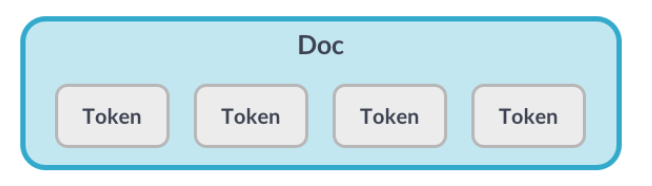

In [8]:
doc[0:2]

Olá Mundo

In [9]:
doc = nlp_en("It costs $5.")

print("Index: ", [token.i for token in doc])
print("Text: ", [token.text for token in doc])
print("is_alpha: ", [token.is_alpha for token in doc])
print("is_punct: ", [token.is_punct for token in doc])
print("like_num: ", [token.like_num for token in doc])

Index:  [0, 1, 2, 3, 4]
Text:  ['It', 'costs', '$', '5', '.']
is_alpha:  [True, True, False, False, False]
is_punct:  [False, False, False, False, True]
like_num:  [False, False, False, True, False]


Um objeto Span é uma fatia do documento que consiste em um ou mais tokens. 

É apenas uma visualização do Documento e não contém nenhum dado em si. Para criar um Span, você pode usar a notação de slice do Python. 


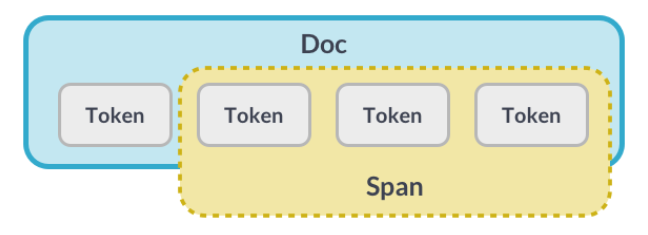

### Getting Started

In [10]:
# Import the English language class
from spacy.lang.en import English

# Create the nlp object
nlp = English()

# Process a text
doc = nlp("This is a sentence.")

# Print the document text
print(doc.text)

This is a sentence.


In [11]:
# Import the German language class
from spacy.lang.de import German

# Create the nlp object
nlp = German()

# Process a text (this is German for: "Kind regards!")
doc = nlp("Liebe Grüße!")

# Print the document text
print(doc.text)

Liebe Grüße!


In [12]:
# Import the Spanish language class
from spacy.lang.es import Spanish

# Create the nlp object
nlp = Spanish()

# Process a text (this is Spanish for: "How are you?")
doc = nlp("¿Cómo estás?")

# Print the document text
print(doc.text)

¿Cómo estás?


### Documents, spans and tokens

In [13]:
# Import the English language class and create the nlp object
from spacy.lang.en import English
nlp = English()

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# Select the first token
first_token = doc[0]

# Print the first token's text
print(first_token.text)

I


In [14]:
doc = nlp("I like tree kangaroos and narwhals.")

In [15]:
# A slice of the Doc for "tree kangaroos"
tree_kangaroos = doc[2:4]
print(tree_kangaroos.text)

tree kangaroos


In [16]:
# A slice of the Doc for "tree kangaroos and narwhals" (without the ".")
tree_kangaroos_and_narwhals = doc[2:6]
print(tree_kangaroos_and_narwhals.text)

tree kangaroos and narwhals


### Lexical attributes

In [18]:
doc = nlp("In 1990, more than 60% of people in East Asia were in extreme poverty. Now less than 4% are.")

In [19]:
# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num:
        # Get the next token in the document
        next_token = doc[token.i + 1]
        # Check if the next token's text equals '%'
        if next_token.text == '%':
            print('Percentage found:', token.text)

Percentage found: 60
Percentage found: 4


## Statistical models

Vamos adicionar mais potência ao objeto nlp!

**O que são modelos estatísticos?**

Algumas das coisas mais interessantes que você pode analisar são específicas do contexto: 
* por exemplo, se uma palavra é um verbo ou se um intervalo de texto é o nome de uma pessoa. Os modelos estatísticos permitem que o spaCy faça previsões no contexto. Isso geralmente inclui marcas de classe gramatical, dependências sintáticas e entidades nomeadas. 

Os modelos são treinados em grandes conjuntos de dados de textos de exemplo rotulados. Eles podem ser atualizados com mais exemplos para ajustar suas previsões - por exemplo, para ter um melhor desempenho em seus dados específicos.

**Pacotes de modelo**

spaCy oferece vários pacotes de modelos pré-treinados que você pode baixar. Por exemplo, o pacote `"en_core_web_sm"` é um pequeno modelo em inglês que oferece suporte a todos os recursos básicos e é treinado em texto da web. 

O método `spacy.load` carrega um pacote de modelo por nome e retorna um objeto nlp. O pacote fornece os pesos binários que permitem ao spaCy fazer previsões. Também inclui o vocabulário e as metainformações para informar ao spaCy qual classe de idioma usar e como configurar o pipeline de processamento.

In [21]:
import spacy

In [24]:
nlp_en = spacy.load("en_core_web_sm")
nlp_pt = spacy.load("pt_core_news_sm") # python -m spacy download pt_core_news_sm

In [27]:
doc_pt = nlp_en("Ela comeu a pizza")

for token in doc_pt:
    print(token.text, token.pos_)

Ela PROPN
comeu VERB
a DET
pizza NOUN


Vamos dar uma olhada nas previsões do modelo. 

Neste exemplo, estamos usando spaCy para prever marcas de classe gramatical, os tipos de palavras no contexto. 

* Primeiro, carregamos o pequeno modelo em inglês e recebemos um objeto nlp. 
* Em seguida, estamos processando o texto "Ela comeu a pizza". 
* Para cada token no Doc, podemos imprimir o texto e o atributo "pos underscore", a tag de classe gramatical prevista. 
* Para o spaCy, os atributos que retornam strings geralmente terminam com um sublinhado - os atributos sem o sublinhado retornam um ID. 
* Aqui, o modelo previu corretamente "ate" como verbo e "pizza" como substantivo.

In [26]:
doc_en = nlp_en("She ate the pizza")

for token in doc_en:
    print(token.text, token.pos_)

She PRON
ate VERB
the DET
pizza NOUN


Além das marcas de classe gramatical, também podemos prever como as palavras estão relacionadas. 

Por exemplo, se uma palavra é o sujeito da frase ou um objeto. 

O atributo "dep_" retorna o rótulo de dependência prevista. O atributo head retorna o token head sintático. Você também pode pensar nisso como o token pai ao qual essa palavra está anexada.

In [28]:
for token in doc_en:
    print(token.text, token.pos_, token.dep_, token.head.text)

She PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


Para descrever dependências sintáticas, spaCy usa um esquema de rótulo padronizado. 

Aqui está um exemplo de alguns rótulos comuns: 

* O pronome "Ela" é um sujeito nominal anexado ao verbo - neste caso, "comeu". 
* O substantivo "pizza" é um objeto direto anexado ao verbo "comeu". 
* É comida pelo sujeito, "ela". 
* O determinante "o", também conhecido como artigo, é anexado ao substantivo "pizza".


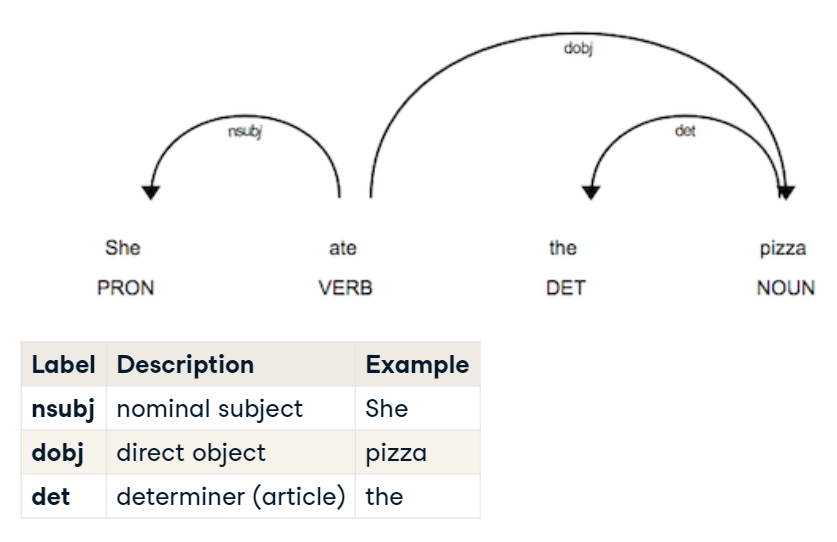

Entidades nomeadas são "objetos do mundo real" que recebem um nome - por exemplo, uma pessoa, uma organização ou um país. A propriedade `doc.ents` permite acessar as entidades nomeadas previstas pelo modelo. 

Ele retorna um iterador de objetos Span, para que possamos imprimir o texto da entidade e o rótulo da entidade usando o atributo "sublinhado do rótulo". Nesse caso, o modelo está prevendo corretamente "Apple" como uma organização, "Reino Unido" como uma entidade geopolítica e "$ 1 bilhão" como dinheiro.

In [36]:
doc = nlp_en(u"Apple is looking at buying U.K. startup for $1 billion")

In [37]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


In [38]:
spacy.explain("GPE")

'Countries, cities, states'

In [39]:
spacy.explain("dobj")

'direct object'

In [40]:
spacy.explain("NNP")

'noun, proper singular'

### Loading models

In [41]:
# Load the 'en_core_web_sm' model – spaCy is already imported
nlp = spacy.load("en_core_web_sm")

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Print the document text
print(doc.text)

It’s official: Apple is the first U.S. public company to reach a $1 trillion market value


In [44]:
nlp = spacy.load("de_core_news_sm")
text = "Als erstes Unternehmen der Börsengeschichte hat Apple einen Marktwert von einer Billion US-Dollar erreicht"
doc = nlp(text)
print(doc.text)

Als erstes Unternehmen der Börsengeschichte hat Apple einen Marktwert von einer Billion US-Dollar erreicht


### Predicting linguistic annotations

In [45]:
nlp_en = spacy.load("en_core_web_sm")
text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

In [46]:
doc = nlp_en(text)

In [47]:
for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print('{:<12}{:<10}{:<10}'.format(token_text, token_pos, token_dep))

It          PRON      dep       
’s          INTJ      intj      
official    ADJ       amod      
:           PUNCT     punct     
Apple       PROPN     nsubj     
is          AUX       ROOT      
the         DET       det       
first       ADJ       amod      
U.S.        PROPN     nmod      
public      ADJ       amod      
company     NOUN      attr      
to          PART      aux       
reach       VERB      relcl     
a           DET       det       
$           SYM       quantmod  
1           NUM       compound  
trillion    NUM       nummod    
market      NOUN      compound  
value       NOUN      dobj      


In [51]:
# Iterate over the predicted entities
for ent in doc.ents:
    # print the entity text and its label
    print(ent.text, ent.label_)

Apple ORG
first ORDINAL
U.S. GPE
$1 trillion MONEY


### Predicting named entities in context

In [52]:
text = "New iPhone X release date leaked as Apple reveals pre-orders by mistake"

# Process the text
doc = nlp_en(text)

# Iterate over the entities
for ent in doc.ents:
    # print the entity text and label
    print(ent.text, ent.label_)

Apple ORG


In [56]:
iphone_x = doc[1:3]
print('Missing entity:', iphone_x.text)

Missing entity: iPhone X


## Rule-based matching

2. Por que não apenas expressões regulares?
Comparado às expressões regulares, o matcher funciona com objetos Doc e Token em vez de apenas strings. Também é mais flexível: você pode pesquisar textos, mas também outros atributos lexicais. Você pode até escrever regras que usam as previsões do modelo. Por exemplo, encontre a palavra "pato" apenas se for um verbo, não um substantivo.

3. Padrões de correspondência
Os padrões de correspondência são listas de dicionários. Cada dicionário descreve um token. As chaves são os nomes dos atributos do token, mapeados para seus valores esperados. Neste exemplo, procuramos dois tokens com o texto "iPhone" e "X". Também podemos combinar outros atributos de token. Aqui, estamos procurando dois tokens cujas formas minúsculas sejam iguais a "iphone" e "x". Podemos até escrever padrões usando atributos previstos pelo modelo. Aqui, estamos combinando um token com o lema "comprar", mais um substantivo. O lema é a forma básica, portanto, esse padrão corresponderia a frases como "comprando leite" ou "comprando flores".

4. Usando o Matcher (1)
Para usar um padrão, primeiro importamos o matcher do spacy dot matcher. Também carregamos um modelo e criamos o objeto nlp. O matcher é inicializado com o vocabulário compartilhado, vocabulário de pontos nlp. Você aprenderá mais sobre isso mais tarde - por enquanto, lembre-se sempre de passá-lo. O método matcher dot add permite adicionar um padrão. O primeiro argumento é um ID exclusivo para identificar qual padrão foi correspondido. O segundo argumento é um retorno de chamada opcional. Não precisamos de um aqui, então o definimos como Nenhum. O terceiro argumento é o padrão. Para corresponder ao padrão em um texto, podemos chamar o matcher em qualquer documento. Isso retornará as correspondências.

5. Usando o Matcher (2)
Quando você chama o matcher em um documento, ele retorna uma lista de tuplas. Cada tupla consiste em três valores: o ID de correspondência, o índice inicial e o índice final do período correspondido. Isso significa que podemos iterar as correspondências e criar um objeto Span: uma parte do documento no índice inicial e final.

6. Atributos lexicais correspondentes
Aqui está um exemplo de um padrão mais complexo usando atributos lexicais. Estamos procurando cinco tokens: Um token que consiste apenas em dígitos. Três tokens que não diferenciam maiúsculas de minúsculas para "fifa", "world" e "cup". E um token que consiste em pontuação. O padrão corresponde aos tokens "2018 FIFA World Cup:".

7. Correspondência de outros atributos de token
Neste exemplo, estamos procurando por dois tokens: um verbo com o lema "amar", seguido por um substantivo. Este padrão irá corresponder a "cães amados" e "gatos do amor".

8. Usando operadores e quantificadores (1)
Operadores e quantificadores permitem definir com que frequência um token deve ser correspondido. Eles podem ser adicionados usando a tecla "OP". Aqui o "?" operador torna o token determinante opcional, então ele irá combinar um token com o lema "comprar", um artigo opcional e um substantivo.

9. Usando operadores e quantificadores (2)
"OP" pode ter um de quatro valores: Um "!" nega o token, portanto, é correspondido 0 vezes. UMA "?" torna o token opcional e corresponde a ele 0 ou 1 vezes. Um "+" corresponde a um token 1 ou mais vezes. E, finalmente, um "*" corresponde a 0 ou mais vezes. Os operadores podem tornar seus padrões muito mais poderosos, mas também adicionam mais complexidade - portanto, use-os com sabedoria.

In [57]:
import spacy
from spacy.matcher import Matcher

In [58]:
nlp = spacy.load("en_core_web_sm")

In [59]:
matcher = Matcher(nlp.vocab)

In [66]:
pattern = [[{'ORTH':'iPhone'},{'ORTH':'X'}]]
matcher.add('IPHONE_PATTERN',pattern)

In [68]:
doc = nlp("New iPhone X release date leaked")

In [69]:
matches = matcher(doc)

In [70]:
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

iPhone X


In [73]:
pattern = [[
    {'IS_DIGIT':True},
    {'LOWER':'fifa'},
    {'LOWER':'world'},
    {'LOWER':'cup'},
    {'IS_PUNCT':True}
]]

doc = nlp("2018 FIFA World Cup: France won!")

matcher.add('FIFA_PATTERN',pattern)
matches = matcher(doc)

for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)


2018 FIFA World Cup:


In [74]:
pattern = [[
    {'LEMMA':'love', 'POS':'VERB'},
    {'POS':'NOUN'}
]]

doc = nlp("I loved dogs but now I love cats more.")

matcher.add('PET_PATTERN',pattern)
matches = matcher(doc)

for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

loved dogs
love cats


In [75]:
pattern = [[
    {'LEMMA':'buy'},
    {'POS':'DET','OP':'?'},
    {'POS':'NOUN'}
]]

doc = nlp("I bought a smartphone. Now I'm buying apps.")

matcher.add('BUY_PATTERN',pattern)
matches = matcher(doc)

for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

bought a smartphone
buying apps






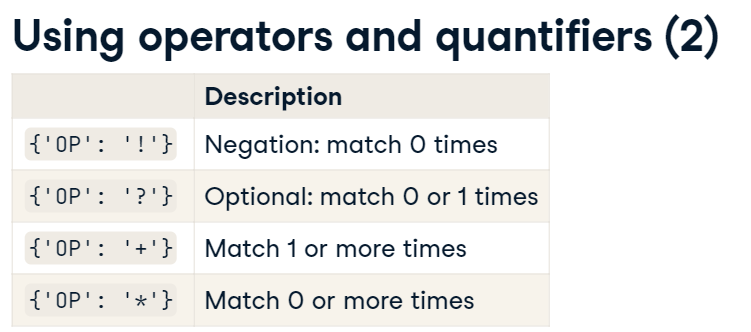

### Writing match patterns

In [76]:
doc = nlp("After making the iOS update you won't notice a radical system-wide redesign: nothing like the aesthetic upheaval we got with iOS 7. Most of iOS 11's furniture remains the same as in iOS 10. But you will discover some tweaks once you delve a little deeper.")

# Write a pattern for full iOS versions ("iOS 7", "iOS 11", "iOS 10")
pattern = [[{'TEXT': 'iOS'}, {'IS_DIGIT': True}]]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('IOS_VERSION_PATTERN', pattern)
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

Total matches found: 3
Match found: iOS 7
Match found: iOS 11
Match found: iOS 10


In [77]:
doc = nlp("i downloaded Fortnite on my laptop and can't open the game at all. Help? so when I was downloading Minecraft, I got the Windows version where it is the '.zip' folder and I used the default program to unpack it... do I also need to download Winzip?")

# Write a pattern that matches a form of "download" plus proper noun
pattern = [[{'LEMMA': 'download'}, {'POS': 'PROPN'}]]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('DOWNLOAD_THINGS_PATTERN', pattern)
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

Total matches found: 3
Match found: downloaded Fortnite
Match found: downloading Minecraft
Match found: download Winzip


In [78]:
doc = nlp("Features of the app include a beautiful design, smart search, automatic labels and optional voice responses.")

# Write a pattern for adjective plus one or two nouns
pattern =[[{'POS': 'ADJ'}, {'POS': 'NOUN'}, {'POS': 'NOUN', 'OP': '?'}]]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('ADJ_NOUN_PATTERN', pattern)
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

Total matches found: 5
Match found: beautiful design
Match found: smart search
Match found: automatic labels
Match found: optional voice
Match found: optional voice responses
